### Data source: https://www.kaggle.com/arjuntejaswi/plant-village

In [1]:
# Import The Libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [2]:
# Image size is 256 * 256
image_size = 256
batch_size = 32

In [3]:
# Load Images from the Directory
data = tf.keras.preprocessing.image_dataset_from_directory(
        'Potato Disease Dataset',
        shuffle = True,
        image_size = (256,256),
        batch_size= batch_size)

Found 2152 files belonging to 3 classes.


In [4]:
data.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# Len of Data is 68 because we have created batch size of 32
len(data)

68

In [6]:
68 * 32

2176

In [7]:
print(data.take(1))

<TakeDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>


In [8]:
class_names = data.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

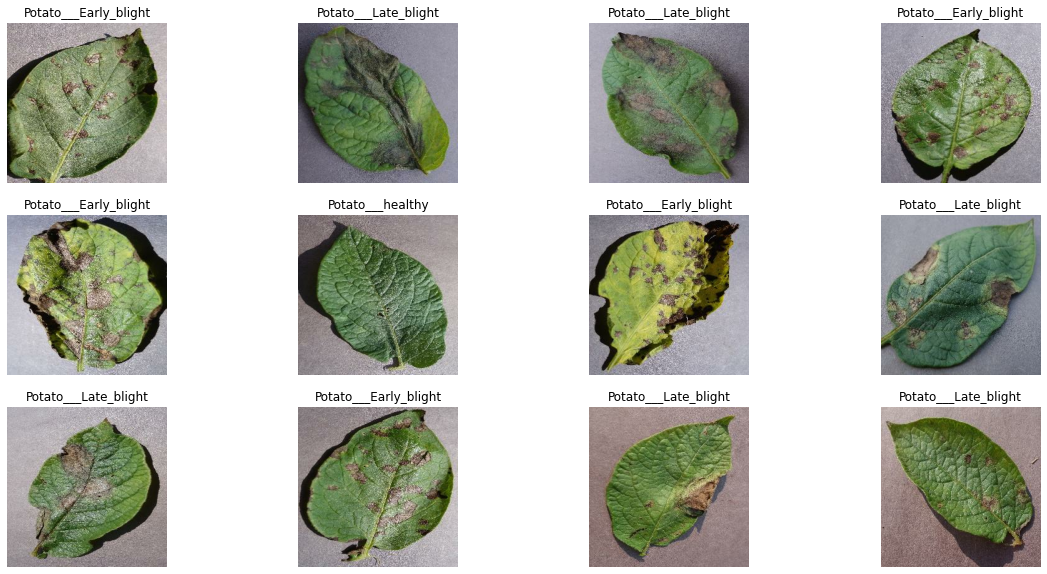

In [9]:
# Plot the Figure
plt.figure(figsize=(20,10))
for image_batch, label_batch in data.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('int'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
# tf doesnot have train test split create a function and Split the data into train test and validation 
def tf_split(data, train_split = 0.8, test_split = 0.1, val_split = 0.1, shuffle=True, shuffle_size=10000):
    
    data_size = len(data)
    
    if shuffle:
        data = data.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split*data_size)
    test_size = int(test_split*data_size)
    val_size = int(val_split * data_size)
    
    train = data.take(train_size)
    val = data.skip(train_size).take(val_size)
    test = data.skip(train_size).skip(val_size)
    
    return(train, val, test)

In [11]:
train, val, test = tf_split(data)

In [12]:
len(train)

54

In [13]:
len(val)

6

In [14]:
len(test)

8

In [15]:
# cache will retain the data into computer memory so next time when you need the data your image will load faster
# if you are using gpu and cpu, your gpu is busy training the data prefetch will load next set of data to cpu
train = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
for i in train.take(1):
    print(i[0])

tf.Tensor(
[[[[211. 206. 210.]
   [203. 198. 202.]
   [204. 199. 203.]
   ...
   [145. 136. 139.]
   [143. 134. 137.]
   [153. 144. 147.]]

  [[210. 205. 209.]
   [206. 201. 205.]
   [205. 200. 204.]
   ...
   [149. 140. 143.]
   [149. 140. 143.]
   [159. 150. 153.]]

  [[212. 207. 211.]
   [212. 207. 211.]
   [207. 202. 206.]
   ...
   [147. 138. 141.]
   [144. 135. 138.]
   [151. 142. 145.]]

  ...

  [[171. 165. 167.]
   [176. 170. 172.]
   [178. 172. 174.]
   ...
   [124. 115. 118.]
   [129. 120. 123.]
   [134. 125. 128.]]

  [[169. 163. 165.]
   [172. 166. 168.]
   [173. 167. 169.]
   ...
   [126. 117. 120.]
   [128. 119. 122.]
   [129. 120. 123.]]

  [[158. 152. 154.]
   [160. 154. 156.]
   [163. 157. 159.]
   ...
   [123. 114. 117.]
   [121. 112. 115.]
   [117. 108. 111.]]]


 [[[199. 180. 186.]
   [180. 161. 167.]
   [226. 207. 213.]
   ...
   [189. 170. 176.]
   [186. 167. 173.]
   [176. 157. 163.]]

  [[204. 185. 191.]
   [193. 174. 180.]
   [216. 197. 203.]
   ...
   [188. 1

In [17]:
# Resize and Rescale The Data
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1/255)
])

In [18]:
# Data Augmentattion
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)   
])

In [19]:
train = train.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
for i in train.take(1):
    

<PrefetchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [20]:
# Create a CNN Model
input_shape = (32, 256, 256, 3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])

model.build(input_shape=input_shape)

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 60, 60, 64)         

In [21]:
import os
print(os.getcwd())

C:\Users\rishi\Desktop\Projects\Potato Disease Classifier


In [22]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.getcwd(), monitor='val_loss', save_best_only=True)

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [26]:
history = model.fit(train, epochs=41, batch_size= 32, verbose=1, validation_data=val, callbacks=callback)

Epoch 1/41
54/54 [==============================] - 75s 1s/step - loss: 0.9092 - accuracy: 0.4722 - val_loss: 0.8782 - val_accuracy: 0.5417
Epoch 2/41
54/54 [==============================] - 72s 1s/step - loss: 0.7818 - accuracy: 0.5938 - val_loss: 0.6462 - val_accuracy: 0.6979
Epoch 3/41
54/54 [==============================] - 75s 1s/step - loss: 0.5436 - accuracy: 0.7425 - val_loss: 0.5027 - val_accuracy: 0.8125
Epoch 4/41
54/54 [==============================] - 77s 1s/step - loss: 0.3982 - accuracy: 0.8310 - val_loss: 0.3627 - val_accuracy: 0.8438
Epoch 5/41
54/54 [==============================] - 76s 1s/step - loss: 0.3187 - accuracy: 0.8704 - val_loss: 0.3070 - val_accuracy: 0.8854
Epoch 6/41
54/54 [==============================] - 76s 1s/step - loss: 0.2797 - accuracy: 0.8819 - val_loss: 0.4481 - val_accuracy: 0.8177
Epoch 7/41
54/54 [==============================] - 78s 1s/step - loss: 0.2179 - accuracy: 0.9120 - val_loss: 0.1691 - val_accuracy: 0.9323
Epoch 8/41
54/54 [==

In [1]:
# You Can Train more if you want to train your model after 31 epoch again do the fit and set the initial epoch = previous epoch
# The Training will start from 32 epoch

In [27]:
model.load_weights(os.getcwd())

In [28]:
scores = model.evaluate(test)

8/8 [==============================] - 4s 368ms/step - loss: 0.0155 - accuracy: 0.9922


In [29]:
scores

[0.0155125567689538, 0.9921875]

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history['accuracy']

[0.4722222089767456,
 0.59375,
 0.7424768805503845,
 0.8310185074806213,
 0.8703703880310059,
 0.8819444179534912,
 0.9120370149612427,
 0.9409722089767456,
 0.9438657164573669,
 0.9537037014961243,
 0.9479166865348816,
 0.9681712985038757,
 0.9473379850387573,
 0.9565972089767456,
 0.9745370149612427,
 0.9629629850387573,
 0.9612268805503845,
 0.9849537014961243,
 0.9728009104728699,
 0.9826388955116272,
 0.9652777910232544,
 0.953125,
 0.9728009104728699,
 0.9832175970077515,
 0.9791666865348816,
 0.9809027910232544,
 0.9907407164573669,
 0.984375,
 0.9866898059844971,
 0.9918981194496155,
 0.9820601940155029,
 0.9849537014961243,
 0.9901620149612427,
 0.9913194179534912,
 0.9814814925193787,
 0.9878472089767456,
 0.9913194179534912,
 0.9884259104728699,
 0.9820601940155029,
 0.9942129850387573,
 0.9959490895271301]

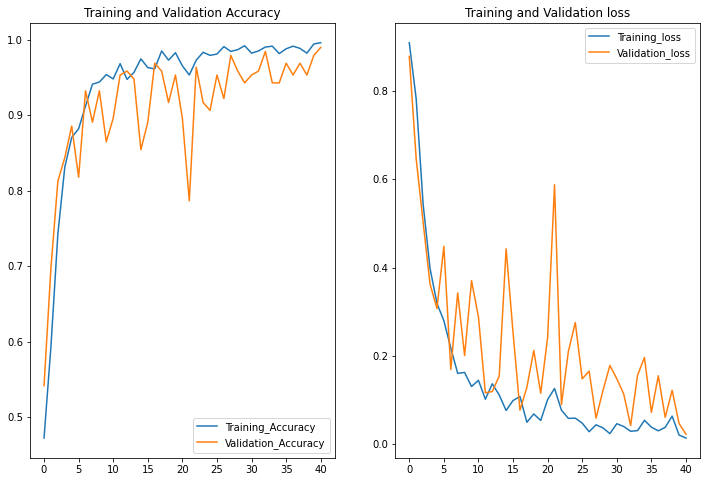

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(range(41),history.history['accuracy'], label = 'Training_Accuracy' )
plt.plot(range(41),history.history['val_accuracy'], label = 'Validation_Accuracy' )
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(41),history.history['loss'], label = 'Training_loss' )
plt.plot(range(41),history.history['val_loss'], label = 'Validation_loss' )
plt.legend()
plt.title('Training and Validation loss')
plt.show()

First Image to Predict
Actual Image: Potato___Late_blight
Predicted Label: Potato___Late_blight


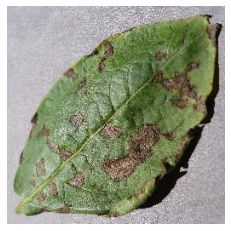

In [34]:
import numpy as np
for images_batch, labels_batch in test.take(1):
    first_image = image_batch[0].numpy().astype('int')
    first_label = labels_batch[0].numpy()
    
    print('First Image to Predict')
    plt.imshow(first_image)
    plt.axis('off')
    print('Actual Image:', class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('Predicted Label:', class_names[np.argmax(batch_prediction[0])])

In [35]:
model.predict(test.take(1))

array([[4.27959783e-08, 1.00000000e+00, 4.42622716e-10],
       [9.93468881e-01, 6.53114123e-03, 8.22280866e-15],
       [1.34671075e-06, 9.99653578e-01, 3.45163920e-04],
       [5.80841743e-07, 9.86411810e-01, 1.35875475e-02],
       [4.73941054e-06, 9.99995232e-01, 2.93726120e-11],
       [3.00984198e-07, 9.99999642e-01, 3.88141221e-11],
       [1.00000000e+00, 9.28328436e-09, 2.17050392e-23],
       [1.17076766e-07, 9.99999881e-01, 2.37491610e-10],
       [9.99999881e-01, 8.78034427e-08, 4.54685828e-19],
       [4.66594656e-07, 9.99984384e-01, 1.51161175e-05],
       [9.99999881e-01, 6.85595225e-08, 2.22455494e-22],
       [9.99999166e-01, 8.70660472e-07, 8.66753579e-20],
       [2.75003422e-05, 9.99972463e-01, 1.51373217e-12],
       [5.75465128e-06, 9.99994278e-01, 1.84389708e-11],
       [9.42629197e-10, 2.15023625e-04, 9.99785006e-01],
       [9.99983668e-01, 1.63594741e-05, 5.52012713e-20],
       [8.35494518e-09, 9.55242932e-01, 4.47570533e-02],
       [2.82386728e-02, 9.71761

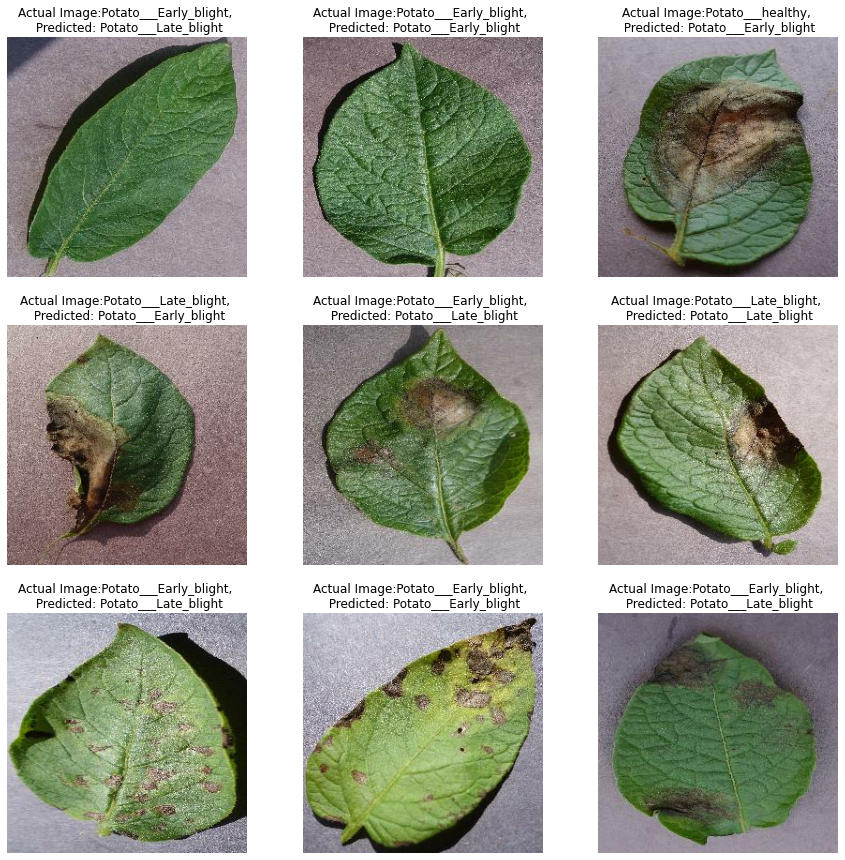

In [55]:
import numpy as np
plt.figure(figsize=(15, 15))
for images_batch, labels_batch in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        images = image_batch[i].numpy().astype('int')
        label = labels_batch[i].numpy()
    
        
        plt.imshow(images)
        plt.axis('off')
        plt.title(f'Actual Image:{class_names[label]}, \n Predicted: {class_names[np.argmax(batch_prediction[i])]}')
        

In [56]:
model.save("potatoes.h5")